# Mid-Course Project | Exploratory Data Analysis

The FICS.org online database contains a set of games payed between humans as well as humans and computers. The data export for this project contains all games played on FICS.org in January 2021.

The number of games per month on FICS dropped off significantly after that date.

In [79]:
import pandas as pd
import numpy as np

### Selecting Useful Columns

The dataset contains the following columns:

- game - an arbitrary index created during the data preparation phase
- Black - the username of the Black player
- BlackElo - the rating of Black https://www.chess.com/terms/elo-rating-chess
- BlackRD - an indicator of the variablility in Black's ELO
- Date - the date of the game
- ECO - a standardised descriptor of the opening sequence https://www.365chess.com/eco.php
- Event - the type of game, rated/unrated and it's format
- Movetext - the sequence of moves played
- Result - 1-0 White win / 0.5-0.5 draw / 0-1 Black win
- Site - data source
- Time - the time of the game start
- TimeControl - the starting time given to each player in seconds + the bonus time gained in seconds after each move
- White - the username of the White player
- WhiteElo - the rating of White
- WhiteRD - an indicator of the variablility in White's ELO
- BlackClock - the amount of time that Black started with
- BlackIsComp - an indicator that Black is a computer bot
- FICSGamesDBGameNo - the FICS database game number
- PlyCount - the number of moves taken
- WhiteClock - the amount of time that White started with
- WhiteIsComp - an indicator that White is a computer bot

In [184]:
fics = pd.read_csv('./Processed Data/data_fics2_prepared.csv')
display(fics.head())
fics.shape

C:\Users\eliza\AppData\Local\Temp\ipykernel_856\2807151115.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  fics = pd.read_csv('./Processed Data/data_fics2_prepared.csv')


,game,Black,BlackClock,BlackElo,BlackIsComp,BlackRD,Date,ECO,Event,FICSGamesDBGameNo,...,Result,Site,Time,TimeControl,Variant,White,WhiteClock,WhiteElo,WhiteIsComp,WhiteRD
0,0,AlexBaban,05:00.0,1696,NaN,48.0,2018.01.31,A00,FICS rated blitz game,430765295,...,1-0,FICS freechess.org,23:52:00,300+0,NaN,jaromsal,05:00.0,1704,NaN,18.0
1,1,youngwalrus,12:00.0,1818,NaN,36.9,2018.01.31,D06,FICS rated standard game,430765294,...,0-1,FICS freechess.org,23:29:00,720+10,NaN,Uris,12:00.0,1679,NaN,40.7
2,2,wollongong,03:00.0,1495,NaN,33.6,2018.01.31,B07,FICS rated blitz game,430765293,...,1-0,FICS freechess.org,23:54:00,180+0,NaN,Eraza,03:00.0,1553,NaN,17.6
3,3,steward,15:00.0,1470,NaN,32.2,2018.01.31,D06,FICS rated standard game,430765292,...,1-0,FICS freechess.org,23:53:00,900+0,NaN,malotfi,15:00.0,1422,NaN,140.5
4,4,JosephAquilino,01:00.0,1410,NaN,32.4,2018.01.31,C44,FICS rated blitz game,430765291,...,1-0,FICS freechess.org,23:44:00,60+10,NaN,TipZilla,01:00.0,1264,NaN,42.6


(753543, 22)

In [81]:
fics.columns

Index(['game', 'Black', 'BlackClock', 'BlackElo', 'BlackIsComp', 'BlackRD',
       'Date', 'ECO', 'Event', 'FICSGamesDBGameNo', 'Movetext', 'PlyCount',
       'Result', 'Site', 'Time', 'TimeControl', 'Variant', 'White',
       'WhiteClock', 'WhiteElo', 'WhiteIsComp', 'WhiteRD'],
      dtype='object')

In [82]:
cols = []
for i in range(len(fics.columns)):
    cols.append(fics.columns[i].lower().replace(' ', '_'))
fics.columns = cols
fics.columns

Index(['game', 'black', 'blackclock', 'blackelo', 'blackiscomp', 'blackrd',
       'date', 'eco', 'event', 'ficsgamesdbgameno', 'movetext', 'plycount',
       'result', 'site', 'time', 'timecontrol', 'variant', 'white',
       'whiteclock', 'whiteelo', 'whiteiscomp', 'whiterd'],
      dtype='object')

The FICS dataset contains 753543 games.

There is redundant information to remove before analysis (see workings below):

'game', 'black', 'site', 'white' and 'ficsgamesdbgameno' do not contain useful information. 'blackclock' and 'whiteclock' contain information already encoded within 'timecontrol'. These can all be removed.

'blackiscomp' can only ever be True when 'whiteiscomp' is False and vice versa. There are rows where both are not True. Therefore these two columns can be consolidated into one.

We will also split the 'timecontrol' values by the + delimiter.

In [83]:
fics.groupby(['event','timecontrol','whiteclock','blackclock']).agg({'game':pd.Series.nunique})

game
event                      timecontrol whiteclock blackclock      
FICS rated blitz game      0+10        00:10.0    00:10.0       68
                           0+12        00:10.0    00:10.0       95
                           0+14        00:10.0    00:10.0        2
                           0+15        00:10.0    00:10.0       77
                           0+17        00:10.0    00:10.0       10
...                                                            ...
FICS unrated standard game 900+20      15:00.0    15:00.0        2
                           900+3       15:00.0    15:00.0        6
                           900+30      15:00.0    15:00.0       16
                           900+5       15:00.0    15:00.0      159
FICS unrated untimed game  0+0         0          0              8

[523 rows x 1 columns]

In [84]:
fics[fics['blackclock']!=fics['whiteclock']]

,game,black,blackclock,blackelo,blackiscomp,blackrd,date,eco,event,ficsgamesdbgameno,...,result,site,time,timecontrol,variant,white,whiteclock,whiteelo,whiteiscomp,whiterd


In [85]:
fics['site'].value_counts()

FICS freechess.org    753543
Name: site, dtype: int64

In [86]:
display(len(fics))
display(len(fics[fics['blackiscomp']=='Yes']))
display(len(fics[fics['whiteiscomp']=='Yes']))
display(len(fics[(fics['blackiscomp']=='Yes')&(fics['whiteiscomp']=='Yes')]))

753543

41510

41035

2045

In [87]:
fics = fics.drop(['game', 'black', 'site', 'white','ficsgamesdbgameno','blackclock','whiteclock'],axis=1)
fics.head()

,blackelo,blackiscomp,blackrd,date,eco,event,movetext,plycount,result,time,timecontrol,variant,whiteelo,whiteiscomp,whiterd
0,1696,NaN,48.0,2018.01.31,A00,FICS rated blitz game,1. b4 d5 2. Bb2 Bf5 3. e3 Nf6 4. Ne2 g6 5. a4 ...,65,1-0,23:52:00,300+0,NaN,1704,NaN,18.0
1,1818,NaN,36.9,2018.01.31,D06,FICS rated standard game,1. d4 d5 2. c4 Nf6 3. Nf3 Bf5 4. Qb3 Nfd7 5. c...,68,0-1,23:29:00,720+10,NaN,1679,NaN,40.7
2,1495,NaN,33.6,2018.01.31,B07,FICS rated blitz game,1. e4 d6 2. Nf3 Nd7 3. Bb5 c6 4. Be2 Ngf6 5. d...,77,1-0,23:54:00,180+0,NaN,1553,NaN,17.6
3,1470,NaN,32.2,2018.01.31,D06,FICS rated standard game,1. d4 d5 2. c4 Bf5 3. Nc3 dxc4 4. Bf4 Nc6 5. a...,33,1-0,23:53:00,900+0,NaN,1422,NaN,140.5
4,1410,NaN,32.4,2018.01.31,C44,FICS rated blitz game,1. e4 e5 2. Nf3 Nc6 3. h3 h6 4. a3 Nf6 5. Nc3 ...,83,1-0,23:44:00,60+10,NaN,1264,NaN,42.6


In [88]:
def comp_clean(row):
    if ((row['blackiscomp'] == 'Yes') & (row['whiteiscomp'] == 'Yes')):
        return 'Both'
    elif row['blackiscomp'] == 'Yes':
        return 'Black'
    elif row['whiteiscomp'] == 'Yes':
        return 'White'
    else:
        return 'None'
        
fics['computer'] = fics.apply(comp_clean, axis=1)

fics = fics.drop(['blackiscomp','whiteiscomp'],axis=1)
fics.head()

,blackelo,blackrd,date,eco,event,movetext,plycount,result,time,timecontrol,variant,whiteelo,whiterd,computer
0,1696,48.0,2018.01.31,A00,FICS rated blitz game,1. b4 d5 2. Bb2 Bf5 3. e3 Nf6 4. Ne2 g6 5. a4 ...,65,1-0,23:52:00,300+0,NaN,1704,18.0,None
1,1818,36.9,2018.01.31,D06,FICS rated standard game,1. d4 d5 2. c4 Nf6 3. Nf3 Bf5 4. Qb3 Nfd7 5. c...,68,0-1,23:29:00,720+10,NaN,1679,40.7,None
2,1495,33.6,2018.01.31,B07,FICS rated blitz game,1. e4 d6 2. Nf3 Nd7 3. Bb5 c6 4. Be2 Ngf6 5. d...,77,1-0,23:54:00,180+0,NaN,1553,17.6,None
3,1470,32.2,2018.01.31,D06,FICS rated standard game,1. d4 d5 2. c4 Bf5 3. Nc3 dxc4 4. Bf4 Nc6 5. a...,33,1-0,23:53:00,900+0,NaN,1422,140.5,None
4,1410,32.4,2018.01.31,C44,FICS rated blitz game,1. e4 e5 2. Nf3 Nc6 3. h3 h6 4. a3 Nf6 5. Nc3 ...,83,1-0,23:44:00,60+10,NaN,1264,42.6,None


In [89]:
fics[['timecontrol','bonus']] = fics.timecontrol.str.split('+',expand=True)
fics.head()

,blackelo,blackrd,date,eco,event,movetext,plycount,result,time,timecontrol,variant,whiteelo,whiterd,computer,bonus
0,1696,48.0,2018.01.31,A00,FICS rated blitz game,1. b4 d5 2. Bb2 Bf5 3. e3 Nf6 4. Ne2 g6 5. a4 ...,65,1-0,23:52:00,300,NaN,1704,18.0,None,0
1,1818,36.9,2018.01.31,D06,FICS rated standard game,1. d4 d5 2. c4 Nf6 3. Nf3 Bf5 4. Qb3 Nfd7 5. c...,68,0-1,23:29:00,720,NaN,1679,40.7,None,10
2,1495,33.6,2018.01.31,B07,FICS rated blitz game,1. e4 d6 2. Nf3 Nd7 3. Bb5 c6 4. Be2 Ngf6 5. d...,77,1-0,23:54:00,180,NaN,1553,17.6,None,0
3,1470,32.2,2018.01.31,D06,FICS rated standard game,1. d4 d5 2. c4 Bf5 3. Nc3 dxc4 4. Bf4 Nc6 5. a...,33,1-0,23:53:00,900,NaN,1422,140.5,None,0
4,1410,32.4,2018.01.31,C44,FICS rated blitz game,1. e4 e5 2. Nf3 Nc6 3. h3 h6 4. a3 Nf6 5. Nc3 ...,83,1-0,23:44:00,60,NaN,1264,42.6,None,10


In [90]:
fics.dtypes

blackelo         int64
blackrd        float64
date            object
eco             object
event           object
movetext        object
plycount         int64
result          object
time            object
timecontrol     object
variant         object
whiteelo         int64
whiterd        float64
computer        object
bonus           object
dtype: object

### Changing Column Formats and Managing NULLs

In [91]:
fics = fics.astype({'timecontrol':'int','bonus':'int'})

The Date and Time columns can be consolidated.

In [92]:
fics['datetime'] = fics['date']+' '+fics['time']
fics['datetime'] = pd.to_datetime(fics['datetime'], format="%Y.%m.%d %H:%M:%S")
fics = fics.drop(['date','time'],axis=1)
fics.head()

,blackelo,blackrd,eco,event,movetext,plycount,result,timecontrol,variant,whiteelo,whiterd,computer,bonus,datetime
0,1696,48.0,A00,FICS rated blitz game,1. b4 d5 2. Bb2 Bf5 3. e3 Nf6 4. Ne2 g6 5. a4 ...,65,1-0,300,NaN,1704,18.0,None,0,2018-01-31 23:52:00
1,1818,36.9,D06,FICS rated standard game,1. d4 d5 2. c4 Nf6 3. Nf3 Bf5 4. Qb3 Nfd7 5. c...,68,0-1,720,NaN,1679,40.7,None,10,2018-01-31 23:29:00
2,1495,33.6,B07,FICS rated blitz game,1. e4 d6 2. Nf3 Nd7 3. Bb5 c6 4. Be2 Ngf6 5. d...,77,1-0,180,NaN,1553,17.6,None,0,2018-01-31 23:54:00
3,1470,32.2,D06,FICS rated standard game,1. d4 d5 2. c4 Bf5 3. Nc3 dxc4 4. Bf4 Nc6 5. a...,33,1-0,900,NaN,1422,140.5,None,0,2018-01-31 23:53:00
4,1410,32.4,C44,FICS rated blitz game,1. e4 e5 2. Nf3 Nc6 3. h3 h6 4. a3 Nf6 5. Nc3 ...,83,1-0,60,NaN,1264,42.6,None,10,2018-01-31 23:44:00


In [93]:
fics.dtypes

blackelo                int64
blackrd               float64
eco                    object
event                  object
movetext               object
plycount                int64
result                 object
timecontrol             int32
variant                object
whiteelo                int64
whiterd               float64
computer               object
bonus                   int32
datetime       datetime64[ns]
dtype: object

Now, check for null values. Only 'eco' and 'variant' has these. 'eco' contains so few that we will drop these rows. 'variant' has so many that we will remove this column.

In [94]:
fics.isna().sum()

blackelo            0
blackrd             0
eco                 8
event               0
movetext            0
plycount            0
result              0
timecontrol         0
variant        753535
whiteelo            0
whiterd             0
computer            0
bonus               0
datetime            0
dtype: int64

In [95]:
fics['variant'].value_counts()

untimed    8
Name: variant, dtype: int64

In [96]:
fics = fics.drop(['variant'],axis=1)

In [97]:
fics = fics[fics['eco'].isna()==False]

The FICS dataset now looks to be ready for our preliminary investigation.

### Data Transformation

I will need some additional columns for the analysis. In particular, I will be interested to see the difference in ELO rating level between players as well as the opening sequences of moves.

The number of distinct chess positions after White’s first move is 20 (16 pawn moves and 4 knight moves). It scales rapidly after that:
- There are 400 distinct chess positions after two moves (first move for White, followed by first move for Black).
- There are 71,852 distinct chess positions or 197,742 total positions after four moves (two moves for White and two moves for Black).
- There are 9,132,484 distinct positions or 120,921,506 total positions after 6 moves (three moves for White and three moves for Black).

For this reason, I will limit my investigation to the first few moves.

'pair01' contains White and Black's opening moves (White first). 'Pair02' contains their second moves, and so on.

'elo_difference' is the difference between the ELO of White and Black. It is positive when WhiteElo is greater than BlackElo and negative for the other way round.

'eco_character' is a rough measure of grouping openings.

In [98]:
fics['elo_difference'] = fics['whiteelo'] - fics['blackelo']

fics['pair01'] = fics['movetext'].apply(lambda st: st[st.find('1.')+3:st.find(' 2.')])
fics['pair02'] = fics['movetext'].apply(lambda st: st[st.find('2.')+3:st.find(' 3.')])
fics['pair03'] = fics['movetext'].apply(lambda st: st[st.find('3.')+3:st.find(' 4.')])
fics['pair04'] = fics['movetext'].apply(lambda st: st[st.find('4.')+3:st.find(' 5.')])

fics['eco_character'] = fics['eco'].str[0]

fics.head()

,blackelo,blackrd,eco,event,movetext,plycount,result,timecontrol,whiteelo,whiterd,computer,bonus,datetime,elo_difference,pair01,pair02,pair03,pair04,eco_character
0,1696,48.0,A00,FICS rated blitz game,1. b4 d5 2. Bb2 Bf5 3. e3 Nf6 4. Ne2 g6 5. a4 ...,65,1-0,300,1704,18.0,None,0,2018-01-31 23:52:00,8,b4 d5,Bb2 Bf5,e3 Nf6,Ne2 g6,A
1,1818,36.9,D06,FICS rated standard game,1. d4 d5 2. c4 Nf6 3. Nf3 Bf5 4. Qb3 Nfd7 5. c...,68,0-1,720,1679,40.7,None,10,2018-01-31 23:29:00,-139,d4 d5,c4 Nf6,Nf3 Bf5,Qb3 Nfd7,D
2,1495,33.6,B07,FICS rated blitz game,1. e4 d6 2. Nf3 Nd7 3. Bb5 c6 4. Be2 Ngf6 5. d...,77,1-0,180,1553,17.6,None,0,2018-01-31 23:54:00,58,e4 d6,Nf3 Nd7,Bb5 c6,Be2 Ngf6,B
3,1470,32.2,D06,FICS rated standard game,1. d4 d5 2. c4 Bf5 3. Nc3 dxc4 4. Bf4 Nc6 5. a...,33,1-0,900,1422,140.5,None,0,2018-01-31 23:53:00,-48,d4 d5,c4 Bf5,Nc3 dxc4,Bf4 Nc6,D
4,1410,32.4,C44,FICS rated blitz game,1. e4 e5 2. Nf3 Nc6 3. h3 h6 4. a3 Nf6 5. Nc3 ...,83,1-0,60,1264,42.6,None,10,2018-01-31 23:44:00,-146,e4 e5,Nf3 Nc6,h3 h6,a3 Nf6,C


In [99]:
fics['ending'] = fics['movetext'].apply(lambda st: st[st.find('{')+1:st.find('}')])
fics['ending'].value_counts()

Black resigns                                              165026
White resigns                                              154398
Black forfeits on time                                     106319
White forfeits on time                                     105923
Black checkmated                                            84309
White checkmated                                            73796
Black forfeits by disconnection                             16971
White forfeits by disconnection                             16591
Game drawn by repetition                                     8771
Game drawn by mutual agreement                               5361
Neither player has mating material                           4457
White ran out of time and Black has no material to mate      3448
Black ran out of time and White has no material to mate      3353
Game drawn by stalemate                                      3303
Game drawn because both players ran out of time               808
White wins

This dataset is now ready for analysis and modelling.

### Initial Analysis and Selection of Rows

In [100]:
fics.shape

(753535, 20)

In [101]:
fics = fics.drop_duplicates(keep='first')
fics.shape

(753533, 20)

The most common 'movetext' value is actually a simple forfeit by disconnection. Games that end in this manner should be discarded from the analysis as they did not finish in an appropriate way.

Similarly, player resignations, time forfeits, and draws after four or fewer moves in total suggests something outside of the game has caused it to stop prematurely.

I will ignore all of these in my analysis.

In [102]:
movetext = fics['movetext'].value_counts()
movetext.head(50)

 {White forfeits by disconnection} 0-1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               1904
 {Black forfeits by disconnection} 1-0                                                                                                                                                                                                                                                                                                                                                                                                        

In [103]:
print('total # games:                                   ',len(fics))
print('# games ended by disconnection:                   ',fics.result[fics['movetext'].str.contains('disconnection')].count())
print('# games ended by resignation in less than 5 moves: ',fics.result[(fics['movetext'].str.contains('resigns'))&(fics['plycount']<5)].count())
print('# games ended by time forfeit in less than 5 moves: ',fics.result[(fics['movetext'].str.contains('forfeits on time'))&(fics['plycount']<5)].count())
print('# games ended by draw in less than 5 moves:          ',fics.result[(fics['movetext'].str.contains('draw'))&(fics['plycount']<5)].count())

total # games:                                    753533
# games ended by disconnection:                    33562
# games ended by resignation in less than 5 moves:  2976
# games ended by time forfeit in less than 5 moves:  269
# games ended by draw in less than 5 moves:           94


We will therefore filter out just under 5% of the games in the database.

In [104]:
def ignore(row):
    if 'disconnection' in row['ending']:
        return True
    elif 'resigns' in row['ending'] and row['plycount'] < 5:
        return True
    elif 'forfeits on time' in row['ending'] and row['plycount'] < 5:
        return True
    elif 'draw' in row['ending'] and row['plycount'] < 5:
        return True
    else:
        return False
        
fics['ignore'] = fics.apply(ignore, axis=1)

To better calculate average outcomes, I will also convert the 'result' field to a numeric. I'll use the standard form of 1 for White wins, 0.5 for draws, and 0 for Black wins.

This allows for easy analysis of game outcome for given criteria (opening moves, event, etc.):

In [105]:
fics['result']=fics['result'].replace({'1-0':1,'1/2-1/2':0.5,'0-1':0})

In [106]:
fics.groupby(['result','ending']).agg({'movetext':pd.Series.nunique}).sort_values(by=['result','movetext'], ascending=False)

movetext
result ending                                                      
1.0    Black resigns                                         162412
       Black forfeits on time                                106281
       Black checkmated                                       82987
       Black forfeits by disconnection                        14312
       White wins by adjudication                               269
0.5    Game drawn by repetition                                8583
       Game drawn by mutual agreement                          5292
       Neither player has mating material                      4457
       White ran out of time and Black has no material...      3448
       Black ran out of time and White has no material...      3353
       Game drawn by stalemate                                 3303
       Game drawn because both players ran out of time          808
       Game drawn by the 50 move rule                           225
       Game drawn by adjudication                                 3
       Game drawn due to length                                   1
0.0    White resigns                                         151379
       White forfeits on time                                105813
       White checkmated                                       73573
       White forfeits by disconnection                        14049
       Black wins by adjudication                               203

In [107]:
fics.groupby(['event']).agg({'movetext':pd.Series.nunique,'result':np.mean}).sort_values(by='movetext', ascending=False)

,movetext,result
event,,
FICS rated blitz game,569763,0.514693
FICS rated lightning game,84652,0.512946
FICS rated standard game,74969,0.515979
FICS unrated blitz game,7532,0.511622
FICS unrated standard game,3759,0.513770
FICS unrated lightning game,528,0.509452


In [108]:
fics.groupby(['computer']).agg({'movetext':pd.Series.nunique,'result':np.mean}).sort_values(by='movetext', ascending=False)

,movetext,result
computer,,
None,665835,0.515331
White,36636,0.644627
Black,36418,0.372824
Both,2026,0.526161


### Considering Numerical and Categorical data

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

fics_filtered = fics[fics['ignore']==False].drop(['ignore'],axis=1)
fics_filtered.describe(include='all').T

C:\Users\eliza\AppData\Local\Temp\ipykernel_856\438518873.py:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  fics_filtered.describe(include='all').T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
blackelo,716632.0,NaN,NaN,NaN,NaT,NaT,1577.867405,257.562154,516.0,1403.0,1566.0,1736.0,3292.0
blackrd,716632.0,NaN,NaN,NaN,NaT,NaT,33.470801,28.709845,11.1,23.1,27.6,34.5,350.0
eco,716632,496,A00,44565,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
event,716632,6,FICS rated blitz game,551406,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
movetext,716632,711834,1. e4 Nc6 2. d4 Nf6 3. e5 h5 4. exf6 h4 5. d5 ...,570,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
plycount,716632.0,NaN,NaN,NaN,NaT,NaT,71.908945,30.362625,3.0,51.0,68.0,90.0,600.0
result,716632.0,NaN,NaN,NaN,NaT,NaT,0.515184,0.489317,0.0,0.0,0.5,1.0,1.0
timecontrol,716632.0,NaN,NaN,NaN,NaT,NaT,325.314666,579.226065,0.0,180.0,180.0,300.0,43200.0
whiteelo,716632.0,NaN,NaN,NaN,NaT,NaT,1577.828622,257.03862,502.0,1403.0,1565.0,1736.0,3297.0
whiterd,716632.0,NaN,NaN,NaN,NaT,NaT,33.464781,28.552944,11.1,23.1,27.6,34.5,350.0


In [110]:
fics_cat = fics_filtered.select_dtypes(object)
fics_num = fics_filtered.select_dtypes(np.number)

Let's review the numeric columns:

- blackelo - 'normalised' distribution with a tail both at high and low values - we might consider removing these outliers
- blackrd - long tail at high values - we might consider removing these outliers
- plycount - long tail at high values - we might consider removing these outliers
- result - essentially a categorical
- timecontrol - long tail at high values - we might consider removing these outliers
- whiteelo - 'normalised' distribution with a tail both at high and low values - we might consider removing these outliers
- whiterd - long tail at high values - we might consider removing these outliers
- bonus - long tail at high values - we might consider removing these outliers
- elo_difference - 'normalised' distribution with a tail both at high and low values - we might consider removing these outliers

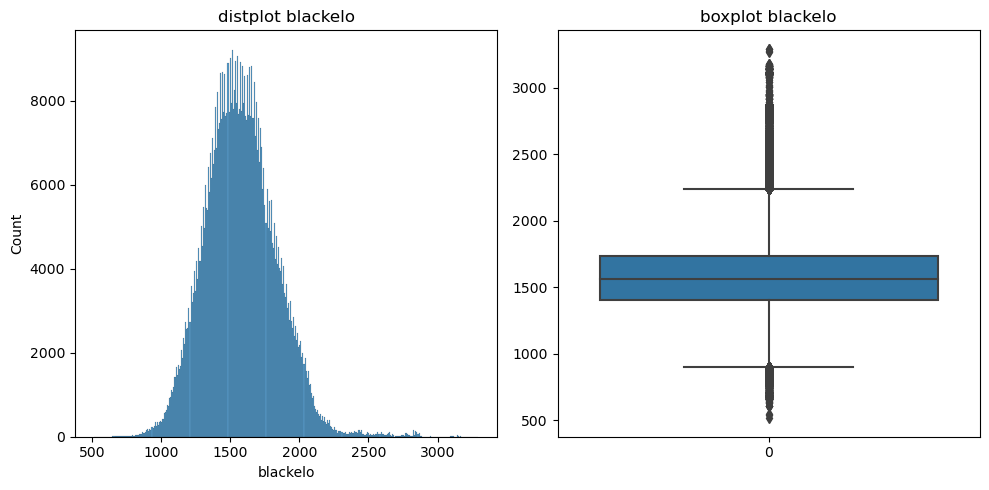

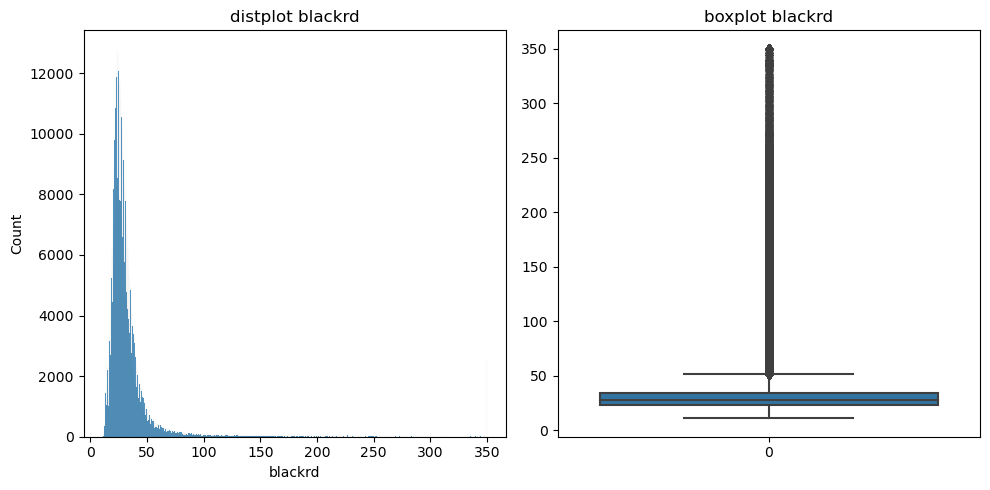

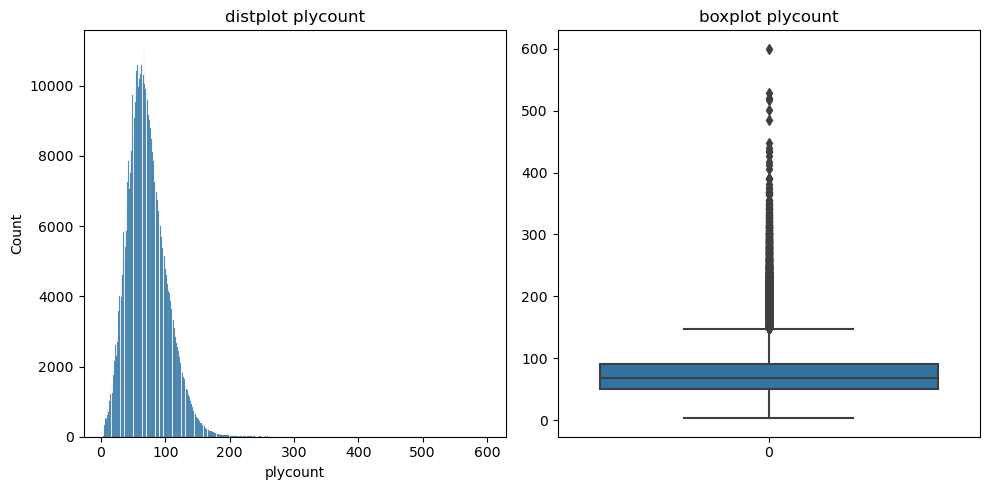

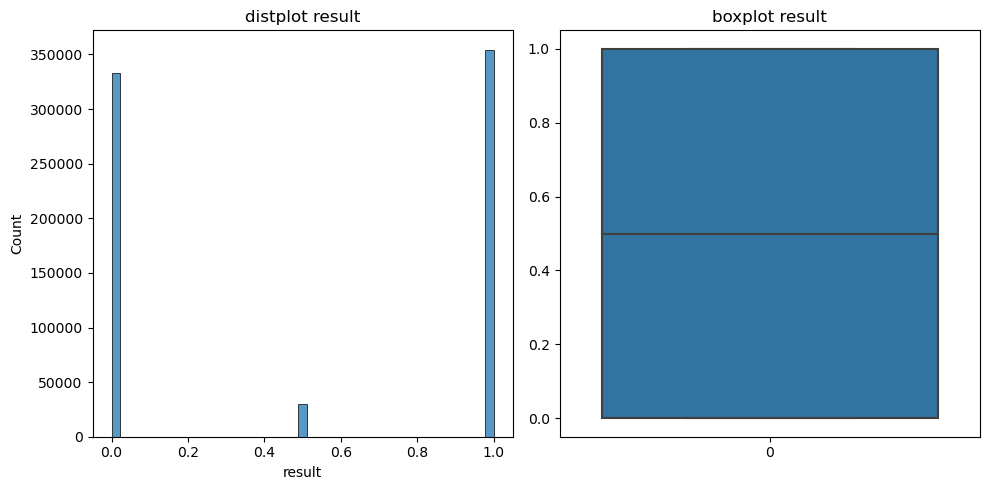

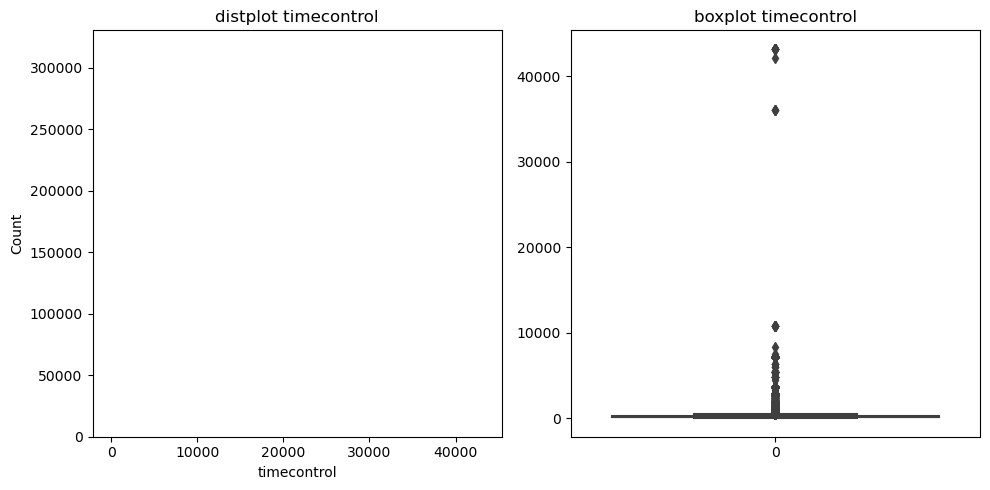

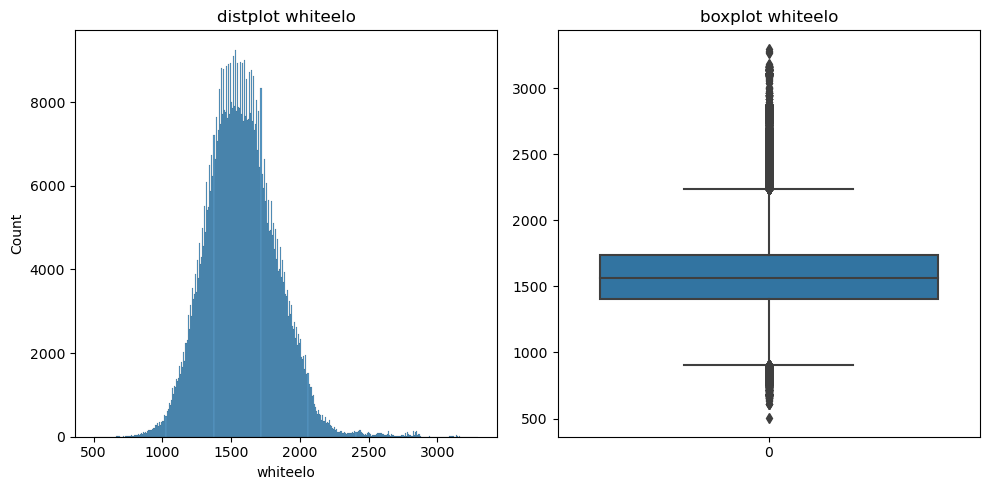

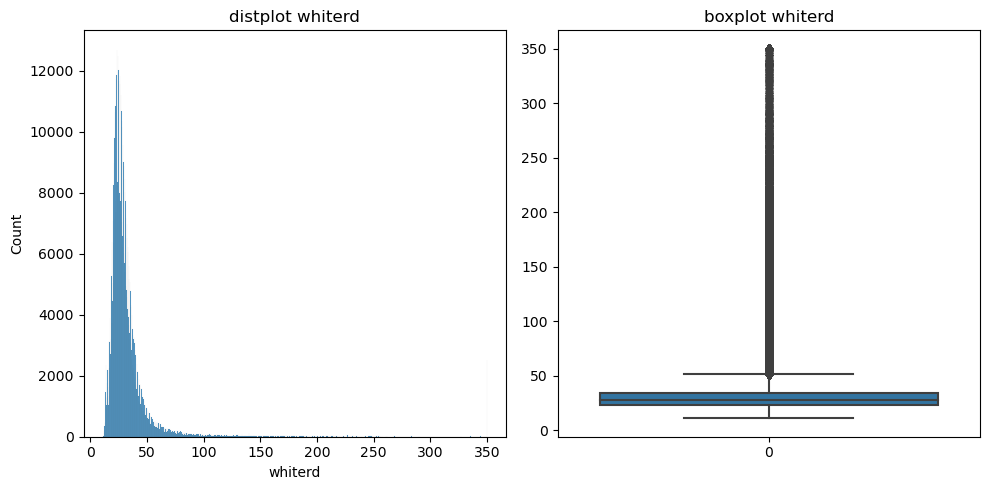

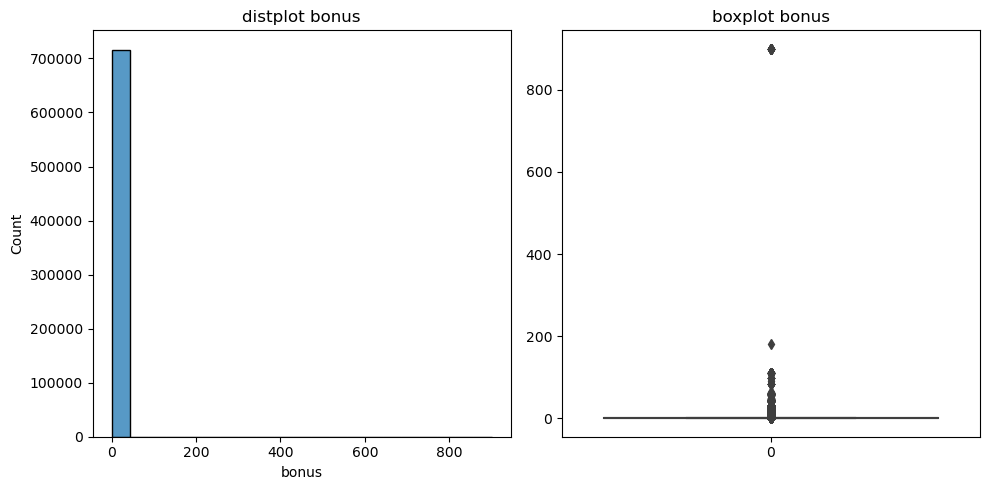

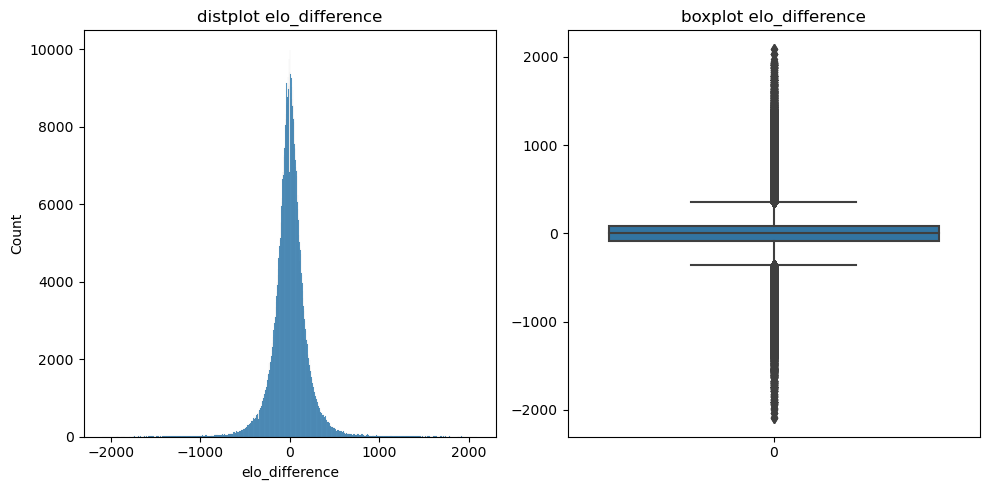

In [111]:
for column in fics_num.columns:
 
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1,2,1)
    sns.histplot(fics_num[column])
    plt.title(f"distplot {column}")
    
    plt.subplot(1,2,2)
    sns.boxplot(fics_num[column])
    plt.title(f"boxplot {column}")
    
    plt.tight_layout()
    plt.show()

Let's also look for correlations between these columns.

As might be expected, we see the following correlations:

- blackelo / whiteelo - strong positive - players tend to play against similarly matched opponents
- whiteelo / elo_difference - positive - the difference of ratings of opponents increases as the ratings increase
- blackelo / elo_difference - negative - this is inverse to above due to the elo_difference calculation
- timecontrol / bonus - positive - longer games have a longer time reward per turn taken

The only feature to correlate significantly with the result is:

- elo_difference / result - positive - if a player is significantly better rated than their opponent, they are more likely to win

The following correlations are reasonably strong but I cannot account for them:

- blackrd / whiterd - positive - I cannot explain this (it is not explained by a correlation with blackelo)
- blackrd / timecontrol - I cannot explain this
- whiterd / timecontrol - I cannot explain this

I will remove columns with high colinearity from future models.

,blackelo,blackrd,plycount,result,timecontrol,whiteelo,whiterd,bonus,elo_difference
blackelo,1.000000,0.031067,0.084658,-0.135512,0.042450,0.696347,0.073873,-0.091661,-0.391863
blackrd,0.031067,1.000000,-0.039025,0.025717,0.477185,0.076765,0.478976,0.067630,0.058499
plycount,0.084658,-0.039025,1.000000,-0.033395,0.032031,0.069330,-0.038917,-0.024039,-0.019870
result,-0.135512,0.025717,-0.033395,1.000000,0.003252,0.133242,-0.023116,0.001824,0.344868
timecontrol,0.042450,0.477185,0.032031,0.003252,1.000000,0.042258,0.480931,0.292447,-0.000357
whiteelo,0.696347,0.076765,0.069330,0.133242,0.042258,1.000000,0.028233,-0.091978,0.387433
whiterd,0.073873,0.478976,-0.038917,-0.023116,0.480931,0.028233,1.000000,0.069220,-0.058698
bonus,-0.091661,0.067630,-0.024039,0.001824,0.292447,-0.091978,0.069220,1.000000,-0.000168
elo_difference,-0.391863,0.058499,-0.019870,0.344868,-0.000357,0.387433,-0.058698,-0.000168,1.000000


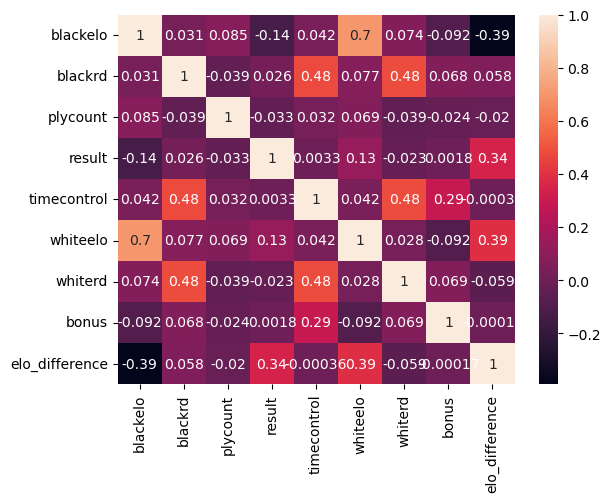

In [112]:
correlations_matrix = fics_num.corr()
display(correlations_matrix)

sns.heatmap(correlations_matrix, annot=True)
plt.show()

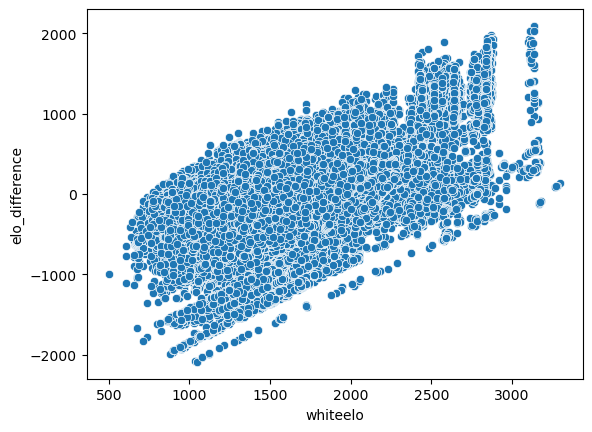

In [113]:
sns.scatterplot(data=fics_num, x="whiteelo", y="elo_difference")
plt.show()

Let's also review those categoric columns with the fewest unique values graphically.

There aren't enough unrated events to warrant keeping these as separate categories, so I will consolidate them into 'blitz', 'standard' and 'lightning'.

There are also only 8 "untimed" games. For simplicity, we will give these the modal values:
- 'event' = blitz
- 'timecontrol' = 180

In [114]:
fics.groupby(['event','timecontrol']).agg({'movetext':pd.Series.nunique}).sort_values(by=['event','movetext'], ascending=[True,False])

movetext
event                      timecontrol          
FICS rated blitz game      180            319753
                           300            178677
                           120             26146
                           600             23666
                           240              7831
...                                          ...
FICS unrated standard game 5940                2
                           1260                1
                           4500                1
                           10800               1
                           36000               1

[118 rows x 1 columns]

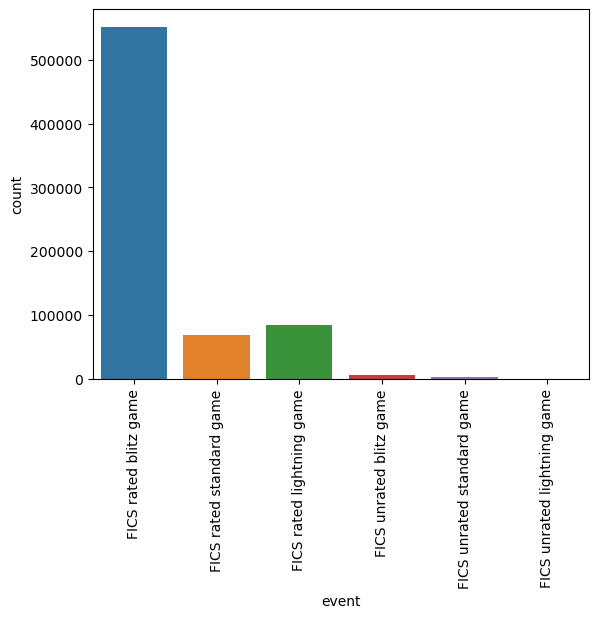

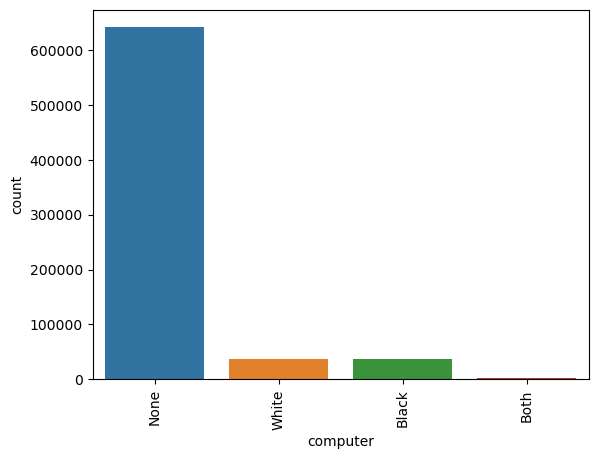

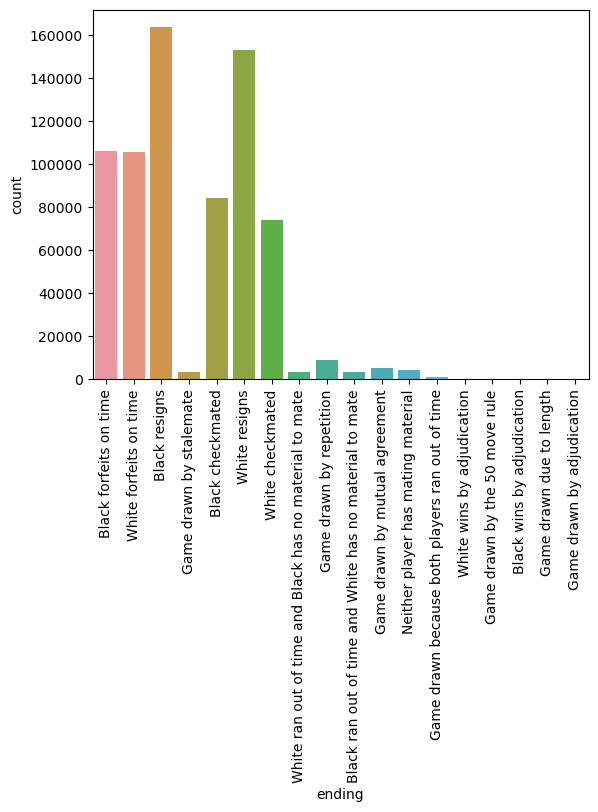

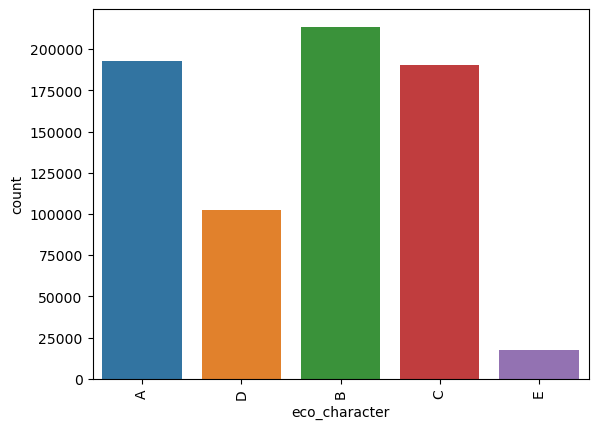

In [115]:
fics_cat_col_to_plot = ['event','computer','ending','eco_character']

# plot_order = df.sort_values(by='Amount', ascending=False).ID.values
# plot = sns.barplot(x='ID', y='Amount', data=df, order=plot_order)

for col in fics_cat_col_to_plot:
    sns.countplot(data=fics_cat, x=col)
    plt.xticks(rotation = 90)
    plt.show()

In [116]:
fics_filtered['timecontrol']=np.where(fics_filtered['event']=='FICS unrated untimed game',180,fics_filtered['timecontrol'])
fics_filtered['event']=np.where(fics_filtered['event']=='FICS unrated untimed game','FICS rated blitz game',fics_filtered['event'])

fics_filtered['event']=fics_filtered['event'].replace({'FICS rated blitz game':'blitz',
                                                       'FICS unrated blitz game':'blitz',
                                                       'FICS rated standard game':'standard',
                                                       'FICS unrated standard game':'standard',
                                                       'FICS rated lightning game':'lightning',                                                  
                                                       'FICS unrated lightning game':'lightning'})

### A simple Predictive Model

Let's make a very simple predictive classification model to give the likely outcome of a game based on the following criteria:
- whiteelo
- whiterd
- elo_difference
- plycount
- computer
- event
- timecontrol
- eco_character

We will start with the fics_filtered dataset to eliminate all games that ended prematurely.

In [117]:
model_data = fics_filtered.copy()

model_data["result"] = model_data["result"].map({1 : 'White Win', 0.5 : 'Draw', 0 : 'Black Win'}).astype('object')

model_data = model_data[['whiteelo','whiterd','elo_difference','plycount','computer','event','timecontrol','eco_character','result']]

In [118]:
model_data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
whiteelo,716632.0,NaN,NaN,NaN,1577.828622,257.03862,502.0,1403.0,1565.0,1736.0,3297.0
whiterd,716632.0,NaN,NaN,NaN,33.464781,28.552944,11.1,23.1,27.6,34.5,350.0
elo_difference,716632.0,NaN,NaN,NaN,-0.038783,200.51431,-2092.0,-89.0,0.0,89.0,2092.0
plycount,716632.0,NaN,NaN,NaN,71.908945,30.362625,3.0,51.0,68.0,90.0,600.0
computer,716632,4,None,641378,NaN,NaN,NaN,NaN,NaN,NaN,NaN
event,716632,3,blitz,558346,NaN,NaN,NaN,NaN,NaN,NaN,NaN
timecontrol,716632.0,NaN,NaN,NaN,325.314666,579.226065,0.0,180.0,180.0,300.0,43200.0
eco_character,716632,5,B,213561,NaN,NaN,NaN,NaN,NaN,NaN,NaN
result,716632,3,White Win,354379,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We will arbitrarily cut out some of the obvious outliers as a start.

In [44]:
print('original size of dataset:  ', len(model_data))

model_data_filtered = model_data[(model_data['timecontrol'] <= 6000) &
                                 (model_data['plycount'] <= 200) &
                                 (model_data['whiterd'] <= 100)]

print('filtered size of dataset:  ',len(model_data_filtered))
print('percentage of data removed: ', round(100*(1-(len(model_data_filtered)/len(model_data))),2), '%')

original size of dataset:   716632
filtered size of dataset:   701594
percentage of data removed:  2.1 %


In [45]:
y = model_data_filtered["result"]
X = model_data_filtered.drop(['result'], axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
display(X_train.head())
y_train

,whiteelo,whiterd,elo_difference,plycount,computer,event,timecontrol,eco_character
476023,2086,21.5,5,37,None,blitz,180,B
375007,1573,27.5,115,114,None,blitz,180,B
322000,1880,35.0,-56,93,None,lightning,60,A
316527,1334,30.7,-148,124,None,blitz,300,A
367707,1092,44.5,54,116,None,blitz,300,C


476023    White Win
375007    Black Win
322000         Draw
316527    Black Win
367707    White Win
            ...    
278790    White Win
393264    White Win
142279    White Win
720770    White Win
131567    White Win
Name: result, Length: 561275, dtype: object

In [46]:
X_train_num = X_train.select_dtypes(np.number).copy()
X_test_num = X_test.select_dtypes(np.number).copy()
X_train_cat = X_train.select_dtypes(object).copy()
X_test_cat = X_test.select_dtypes(object).copy()

In [47]:
from sklearn.preprocessing import MinMaxScaler

transformer = MinMaxScaler().fit(X_train_num)

X_train_scaled = pd.DataFrame(transformer.transform(X_train_num), columns=X_train_num.columns)
X_test_scaled = pd.DataFrame(transformer.transform(X_test_num), columns=X_train_num.columns)

X_train_scaled.head()

,whiteelo,whiterd,elo_difference,plycount,timecontrol
0,0.549647,0.116985,0.501195,0.172589,0.033333
1,0.358869,0.184477,0.527486,0.563452,0.033333
2,0.473038,0.268841,0.486616,0.456853,0.011111
3,0.269989,0.220472,0.464627,0.614213,0.055556
4,0.179993,0.375703,0.512906,0.573604,0.055556


In [48]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first').fit(X_train_cat)
cols = encoder.get_feature_names_out(input_features=X_train_cat.columns)

X_train_encode = pd.DataFrame(encoder.transform(X_train_cat).toarray(),columns=cols)
X_test_encode = pd.DataFrame(encoder.transform(X_test_cat).toarray(),columns=cols)

X_train_encode.head()

,computer_Both,computer_None,computer_White,event_lightning,event_standard,eco_character_B,eco_character_C,eco_character_D,eco_character_E
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [49]:
X_train_transformed = pd.concat([X_train_scaled,X_train_encode], axis = 1)
X_test_transformed = pd.concat([X_test_scaled,X_test_encode], axis = 1)

y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

display(y_train.head())
display(X_train_transformed.head())
X_train_transformed.describe(include = 'all').T

0    White Win
1    Black Win
2         Draw
3    Black Win
4    White Win
Name: result, dtype: object

,whiteelo,whiterd,elo_difference,plycount,timecontrol,computer_Both,computer_None,computer_White,event_lightning,event_standard,eco_character_B,eco_character_C,eco_character_D,eco_character_E
0,0.549647,0.116985,0.501195,0.172589,0.033333,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.358869,0.184477,0.527486,0.563452,0.033333,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.473038,0.268841,0.486616,0.456853,0.011111,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.269989,0.220472,0.464627,0.614213,0.055556,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.179993,0.375703,0.512906,0.573604,0.055556,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


,count,mean,std,min,25%,50%,75%,max
whiteelo,561275.0,0.360347,0.093728,0.0,0.296393,0.355894,0.419115,1.0
whiterd,561275.0,0.215402,0.132754,0.0,0.133858,0.183352,0.256468,1.0
elo_difference,561275.0,0.500437,0.046304,0.0,0.479207,0.500000,0.521033,1.0
plycount,561275.0,0.349348,0.150454,0.0,0.243655,0.329949,0.441624,1.0
timecontrol,561275.0,0.055287,0.067456,0.0,0.033333,0.033333,0.055556,1.0
computer_Both,561275.0,0.002671,0.051610,0.0,0.000000,0.000000,0.000000,1.0
computer_None,561275.0,0.897934,0.302735,0.0,1.000000,1.000000,1.000000,1.0
computer_White,561275.0,0.051303,0.220615,0.0,0.000000,0.000000,0.000000,1.0
event_lightning,561275.0,0.119797,0.324724,0.0,0.000000,0.000000,0.000000,1.0
event_standard,561275.0,0.094946,0.293141,0.0,0.000000,0.000000,0.000000,1.0


In [50]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=0, solver='saga').fit(X_train_transformed, y_train)

In [51]:
predictions_LR = LR.predict(X_test_transformed)
list(predictions_LR)

['Black Win',
 'White Win',
 'White Win',
 'White Win',
 'Black Win',
 'Black Win',
 'White Win',
 'White Win',
 'Black Win',
 'White Win',
 'Black Win',
 'Black Win',
 'White Win',
 'Black Win',
 'White Win',
 'White Win',
 'White Win',
 'Black Win',
 'Black Win',
 'White Win',
 'Black Win',
 'White Win',
 'White Win',
 'White Win',
 'White Win',
 'White Win',
 'White Win',
 'Black Win',
 'Black Win',
 'White Win',
 'Black Win',
 'White Win',
 'Black Win',
 'White Win',
 'Black Win',
 'Black Win',
 'Black Win',
 'White Win',
 'White Win',
 'Black Win',
 'Black Win',
 'Black Win',
 'Black Win',
 'White Win',
 'White Win',
 'Black Win',
 'Black Win',
 'Black Win',
 'Black Win',
 'White Win',
 'Black Win',
 'White Win',
 'Black Win',
 'White Win',
 'Black Win',
 'Black Win',
 'Black Win',
 'White Win',
 'Black Win',
 'White Win',
 'Black Win',
 'Black Win',
 'Black Win',
 'Black Win',
 'White Win',
 'Black Win',
 'Black Win',
 'White Win',
 'White Win',
 'White Win',
 'Black Win',
 'Blac

In [52]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions_LR)

array([[38560,   302, 25987],
       [ 2717,   199,  2752],
       [21815,   295, 47692]], dtype=int64)

In [53]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

score_LR = LR.score(X_test_transformed, y_test)
precision_LR = precision_score(y_test, predictions_LR, average = 'weighted')
recall_LR = recall_score(y_test, predictions_LR, average = 'weighted')
f1_LR = f1_score(y_test, predictions_LR, average = 'weighted')

print("score_LR: ", score_LR)
print("precision_LR: ", precision_LR)
print("recall_LR: ", recall_LR)
print("f1_LR: ", f1_LR)

score_LR:  0.6161033074637077
precision_LR:  0.6029576415272091
recall_LR:  0.6161033074637077
f1_LR:  0.6055385703799839


Alternative, use a Nearest Neighbour Classifier (KNC) model:

In [54]:
from sklearn import neighbors
KNC = neighbors.KNeighborsClassifier(n_neighbors=3, weights='uniform')
KNC.fit(X_train_transformed, y_train)

KNeighborsClassifier(n_neighbors=3)

In [55]:
predictions_KNC = KNC.predict(X_test_transformed)
confusion_matrix(y_test, predictions_KNC)

array([[37630,   801, 26418],
       [ 2997,   397,  2274],
       [28209,   702, 40891]], dtype=int64)

In [56]:
score_KNC = KNC.score(X_test_transformed, y_test)
precision_KNC = precision_score(y_test, predictions_KNC, average = 'weighted')
recall_KNC = recall_score(y_test, predictions_KNC, average = 'weighted')
f1_KNC = f1_score(y_test, predictions_KNC, average = 'weighted')

print("score_KNC: ", score_KNC)
print("precision_KNC: ", precision_KNC)
print("recall_KNC: ", recall_KNC)
print("f1_KNC: ", f1_KNC)

score_KNC:  0.5624184892993821
precision_KNC:  0.5534137988755804
recall_KNC:  0.5624184892993821
f1_KNC:  0.5562870105151454


### Improving this by rebalancing the dataset

In [57]:
from sklearn.utils import resample

train = pd.concat([X_train_transformed, y_train],axis=1)

display(train.head())

model_white = train[train['result']=='White Win']
model_draw = train[train['result']=='Draw']
model_black = train[train['result']=='Black Win']

print('White Win: ',len(model_white),' / ',round(100*len(model_white)/len(train),1),'%')
print('Draw:       ',len(model_draw),' /  ',round(100*len(model_draw)/len(train),1),'%')
print('Black Win: ',len(model_black),' / ',round(100*len(model_black)/len(train),1),'%')

,whiteelo,whiterd,elo_difference,plycount,timecontrol,computer_Both,computer_None,computer_White,event_lightning,event_standard,eco_character_B,eco_character_C,eco_character_D,eco_character_E,result
0,0.549647,0.116985,0.501195,0.172589,0.033333,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,White Win
1,0.358869,0.184477,0.527486,0.563452,0.033333,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Black Win
2,0.473038,0.268841,0.486616,0.456853,0.011111,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Draw
3,0.269989,0.220472,0.464627,0.614213,0.055556,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Black Win
4,0.179993,0.375703,0.512906,0.573604,0.055556,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,White Win


White Win:  278864  /  49.7 %
Draw:        22435  /   4.0 %
Black Win:  259976  /  46.3 %


First, let's oversample the Draws:

In [58]:
model_draw_oversampled = resample(model_draw,
                                    replace=True,
                                    n_samples = len(model_black),
                                    random_state=0)

display(model_white.shape)
display(model_draw_oversampled.shape)
display(model_black.shape)

(278864, 15)

(259976, 15)

(259976, 15)

In [59]:
train_oversampled = pd.concat([model_white,model_draw_oversampled,model_black],axis=0)
y_train_over = train_oversampled['result'].copy()
X_train_over = train_oversampled.drop('result',axis = 1).copy()

In [60]:
LR_over = LogisticRegression(random_state=0, solver='lbfgs')
LR_over.fit(X_train_over, y_train_over)

pred_LR_over = LR_over.predict(X_test_transformed)
confusion_matrix(y_test,pred_LR_over)

score_LR_over = LR_over.score(X_test_transformed, y_test)
precision_LR_over = precision_score(y_test, pred_LR_over, average = 'weighted')
recall_LR_over = recall_score(y_test, pred_LR_over, average = 'weighted')
f1_LR_over = f1_score(y_test, pred_LR_over, average = 'weighted')

print("score_LR_over: ", score_LR_over)
print("precision_LR_over: ", precision_LR_over)
print("recall_LR_over: ", recall_LR_over)
print("f1_LR_over: ", f1_LR_over)

C:\Users\eliza\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


score_LR_over:  0.5394707773002944
precision_LR_over:  0.6256764911469158
recall_LR_over:  0.5394707773002944
f1_LR_over:  0.5684496749037694


Now, let's try undersampling both the White and Black wins:

In [61]:
model_white_undersampled = resample(model_white,
                                    replace=False,
                                    n_samples = len(model_draw),
                                    random_state=0)
model_black_undersampled = resample(model_black,
                                    replace=False,
                                    n_samples = len(model_draw),
                                    random_state=0)

display(model_white_undersampled.shape)
display(model_draw.shape)
display(model_black_undersampled.shape)

(22435, 15)

(22435, 15)

(22435, 15)

In [62]:
train_undersampled = pd.concat([model_white_undersampled,model_draw,model_black_undersampled],axis=0)
y_train_under = train_undersampled['result'].copy()
X_train_under = train_undersampled.drop('result',axis = 1).copy()

In [63]:
LR_under = LogisticRegression(random_state=0, solver='lbfgs')
LR_under.fit(X_train_under, y_train_under)

pred_LR_under = LR_under.predict(X_test_transformed)
confusion_matrix(y_test,pred_LR_under)

score_LR_under = LR_under.score(X_test_transformed, y_test)
precision_LR_under = precision_score(y_test, pred_LR_under, average = 'weighted')
recall_LR_under = recall_score(y_test, pred_LR_under, average = 'weighted')
f1_LR_under = f1_score(y_test, pred_LR_under, average = 'weighted')

print("score_LR_under: ", score_LR_under)
print("precision_LR_under: ", precision_LR_under)
print("recall_LR_under: ", recall_LR_under)
print("f1_LR_under: ", f1_LR_under)

C:\Users\eliza\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


score_LR_under:  0.5347458291464449
precision_LR_under:  0.6252792909807569
recall_LR_under:  0.5347458291464449
f1_LR_under:  0.5664274361368533


### Improving by removing further outliers

In [64]:
model_data.describe().T

,count,mean,std,min,25%,50%,75%,max
whiteelo,716632.0,1577.828622,257.038620,502.0,1403.0,1565.0,1736.0,3297.0
whiterd,716632.0,33.464781,28.552944,11.1,23.1,27.6,34.5,350.0
elo_difference,716632.0,-0.038783,200.514310,-2092.0,-89.0,0.0,89.0,2092.0
plycount,716632.0,71.908945,30.362625,3.0,51.0,68.0,90.0,600.0
timecontrol,716632.0,325.314666,579.226065,0.0,180.0,180.0,300.0,43200.0


In [65]:
whiteelo_iqr = np.nanpercentile(model_data['whiteelo'],75) - np.nanpercentile(model_data['whiteelo'],25)
whiteelo_upper_limit = np.nanpercentile(model_data['whiteelo'],75) + 1.5*whiteelo_iqr

whiterd_upper_limit = np.nanpercentile(model_data['whiterd'],75) + 1.5*(np.nanpercentile(model_data['whiterd'],75) - np.nanpercentile(model_data['whiterd'],25))
elo_difference_upper_limit = np.nanpercentile(model_data['elo_difference'],75) + 1.5*(np.nanpercentile(model_data['elo_difference'],75) - np.nanpercentile(model_data['elo_difference'],25))
plycount_upper_limit = np.nanpercentile(model_data['plycount'],75) + 1.5*(np.nanpercentile(model_data['plycount'],75) - np.nanpercentile(model_data['plycount'],25))
timecontrol_upper_limit = np.nanpercentile(model_data['timecontrol'],75) + 1.5*(np.nanpercentile(model_data['timecontrol'],75) - np.nanpercentile(model_data['timecontrol'],25))

print('original size of dataset:    ', len(model_data))

model2_data_filtered = model_data[(model_data['timecontrol'] < timecontrol_upper_limit) &
                                  (model_data['plycount'] < plycount_upper_limit) &
                                  (model_data['whiterd'] < whiterd_upper_limit) &
                                  (model_data['whiteelo'] < whiteelo_upper_limit) &
                                  (model_data['elo_difference'] < elo_difference_upper_limit)]

print('filtered size of dataset:    ',len(model2_data_filtered))
print('percentage of data removed: ', round(100*(1-(len(model2_data_filtered)/len(model_data))),2), '%')

original size of dataset:     716632
filtered size of dataset:     564687
percentage of data removed:  21.2 %


In [66]:
y2 = model2_data_filtered["result"]
X2 = model2_data_filtered.drop(['result'], axis=1)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

X2_train_num = X2_train.select_dtypes(np.number).copy()
X2_test_num = X2_test.select_dtypes(np.number).copy()
X2_train_cat = X2_train.select_dtypes(object).copy()
X2_test_cat = X2_test.select_dtypes(object).copy()

In [67]:
transformer2 = MinMaxScaler().fit(X2_train_num)

X2_train_scaled = pd.DataFrame(transformer.transform(X2_train_num), columns=X2_train_num.columns)
X2_test_scaled = pd.DataFrame(transformer.transform(X2_test_num), columns=X2_train_num.columns)

encoder2 = OneHotEncoder(drop='first').fit(X2_train_cat)
cols2 = encoder.get_feature_names_out(input_features=X2_train_cat.columns)

X2_train_encode = pd.DataFrame(encoder.transform(X2_train_cat).toarray(),columns=cols2)
X2_test_encode = pd.DataFrame(encoder.transform(X2_test_cat).toarray(),columns=cols2)

X2_train_transformed = pd.concat([X2_train_scaled,X2_train_encode], axis = 1)
X2_test_transformed = pd.concat([X2_test_scaled,X2_test_encode], axis = 1)

y2_train = y2_train.reset_index(drop=True)
y2_test = y2_test.reset_index(drop=True)

In [68]:
LR2 = LogisticRegression(random_state=0, solver='saga').fit(X2_train_transformed, y2_train)

predictions_LR2 = LR2.predict(X2_test_transformed)
confusion_matrix(y2_test, predictions_LR2)

array([[31778,    53, 21819],
       [ 2223,    32,  1956],
       [18521,    88, 36468]], dtype=int64)

In [69]:
score_LR2 = LR2.score(X2_test_transformed, y2_test)
precision_LR2 = precision_score(y2_test, predictions_LR2, average = 'weighted')
recall_LR2 = recall_score(y2_test, predictions_LR2, average = 'weighted')
f1_LR2 = f1_score(y2_test, predictions_LR2, average = 'weighted')

print("score_LR2: ", score_LR2)
print("precision_LR2: ", precision_LR2)
print("recall_LR2: ", recall_LR2)
print("f1_LR2: ", f1_LR2)

score_LR2:  0.6045617949671501
precision_LR2:  0.589528509521687
recall_LR2:  0.6045617949671501
f1_LR2:  0.5933470785793736


### Model summary

In [78]:
print('model     ->           LR          |        KNC         |       LR_over      |       LR_under     |       LR2')
print('score     ->   ',score_LR,'|',score_KNC,'|',score_LR_over,'|',score_LR_under,'|',score_LR2)
print('precision ->   ',precision_LR,'|',precision_KNC,'|',precision_LR_over,'|',precision_LR_under,'|',precision_LR2)
print('recall    ->   ',recall_LR,'|',recall_KNC,'|',recall_LR_over,'|',recall_LR_under,'|',recall_LR2)
print('f1        ->   ',f1_LR,'|',f1_KNC,'|',f1_LR_over,'|',f1_LR_under,'|',f1_LR2)

model     ->           LR          |        KNC         |       LR_over      |       LR_under     |       LR2
score     ->    0.6161033074637077 | 0.5624184892993821 | 0.5394707773002944 | 0.5347458291464449 | 0.6045617949671501
precision ->    0.6029576415272091 | 0.5534137988755804 | 0.6256764911469158 | 0.6252792909807569 | 0.589528509521687
recall    ->    0.6161033074637077 | 0.5624184892993821 | 0.5394707773002944 | 0.5347458291464449 | 0.6045617949671501
f1        ->    0.6055385703799839 | 0.5562870105151454 | 0.5684496749037694 | 0.5664274361368533 | 0.5933470785793736


### Grouping data by ELO

In [120]:
display(fics_filtered.shape)
fics_filtered.head()

(716632, 20)

,blackelo,blackrd,eco,event,movetext,plycount,result,timecontrol,whiteelo,whiterd,computer,bonus,datetime,elo_difference,pair01,pair02,pair03,pair04,eco_character,ending
0,1696,48.0,A00,blitz,1. b4 d5 2. Bb2 Bf5 3. e3 Nf6 4. Ne2 g6 5. a4 ...,65,1.0,300,1704,18.0,None,0,2018-01-31 23:52:00,8,b4 d5,Bb2 Bf5,e3 Nf6,Ne2 g6,A,Black forfeits on time
1,1818,36.9,D06,standard,1. d4 d5 2. c4 Nf6 3. Nf3 Bf5 4. Qb3 Nfd7 5. c...,68,0.0,720,1679,40.7,None,10,2018-01-31 23:29:00,-139,d4 d5,c4 Nf6,Nf3 Bf5,Qb3 Nfd7,D,White forfeits on time
2,1495,33.6,B07,blitz,1. e4 d6 2. Nf3 Nd7 3. Bb5 c6 4. Be2 Ngf6 5. d...,77,1.0,180,1553,17.6,None,0,2018-01-31 23:54:00,58,e4 d6,Nf3 Nd7,Bb5 c6,Be2 Ngf6,B,Black forfeits on time
3,1470,32.2,D06,standard,1. d4 d5 2. c4 Bf5 3. Nc3 dxc4 4. Bf4 Nc6 5. a...,33,1.0,900,1422,140.5,None,0,2018-01-31 23:53:00,-48,d4 d5,c4 Bf5,Nc3 dxc4,Bf4 Nc6,D,Black resigns
4,1410,32.4,C44,blitz,1. e4 e5 2. Nf3 Nc6 3. h3 h6 4. a3 Nf6 5. Nc3 ...,83,1.0,60,1264,42.6,None,10,2018-01-31 23:44:00,-146,e4 e5,Nf3 Nc6,h3 h6,a3 Nf6,C,Black forfeits on time


Let's now group the dataset by ELO. We use the dataset from earlier that filtered out all premature terminations so we should have some decent games to draw insights from.

In [136]:
fics_filtered['q_whiteelo'] = pd.qcut(fics_filtered['whiteelo'], 5, labels = ['Q1','Q2','Q3','Q4','Q5'])
fics_filtered['q_blackelo'] = pd.qcut(fics_filtered['blackelo'], 5, labels = ['Q1','Q2','Q3','Q4','Q5'])

In [181]:
elo_result = pd.crosstab(fics_filtered['q_whiteelo'], fics_filtered['q_blackelo'], values = fics_filtered['result'], aggfunc=np.mean, margins=False)
elo_result

q_blackelo,Q1,Q2,Q3,Q4,Q5
q_whiteelo,,,,,
Q1,89515,33402,11164,5798,3437
Q2,33186,61497,33357,10498,4160
Q3,10316,33174,57163,31921,9375
Q4,5542,10778,32428,62380,31395
Q5,3361,4090,9363,31163,93996


An average score of 0.5 indicates the same number of White wins and Black wins, as well as an unknown number of Draws.

Players at higher ELO ratings than their opponents shift the average score above 0.5 for White and below 0.5 for Black. Clearly better players beat poorer players more often, so let's look at matches between players in the same quantiles. This accounts for around half the dataset.

Looking down the diagonal cotaining players of similar ability, we see that scores are consistently slightly above 0.5. This makes sense as White is always one move ahead and can largely determine the opening sequence played on which to play the game.

In [139]:
fics_matched = fics_filtered[fics_filtered['q_whiteelo']==fics_filtered['q_blackelo']].copy()
print(round(100*len(fics_matched)/len(fics_filtered),1),'%')
fics_matched.shape

51.1 %


(365942, 22)

In [199]:
eco_char_result_matched = pd.crosstab(fics_matched['eco_character'], fics_matched['result'], values = fics_matched['result'], aggfunc=np.size, margins=False)
display(eco_char_result_matched)

result,0.0,0.5,1.0
eco_character,,,
A,45132,4515,48413
B,50186,4877,51981
C,44995,4221,49296
D,23533,2766,26771
E,4256,602,4398


In [200]:
from scipy.stats import chi2_contingency

chi2_contingency(np.array(eco_char_result_matched))

Chi2ContingencyResult(statistic=229.06076358678257, pvalue=4.678673278562081e-45, dof=8, expected_freq=array([[45045.61411371,  4550.32999765, 48464.05588864],
       [49172.57512939,  4967.21929705, 52904.20557356],
       [45253.24839455,  4571.3043925 , 48687.44721295],
       [24378.65328385,  2462.63525367, 26228.71146247],
       [ 4251.90907849,   429.51105913,  4574.57986238]]))

In [201]:
print('average score: ',np.mean(fics_matched['result']))

elo_eco_result_matched = pd.crosstab(fics_matched['q_whiteelo'], fics_matched['eco_character'], values = fics_matched['result'], aggfunc=np.mean, margins=False)
display(elo_eco_result_matched)
elo_eco_count_matched = pd.crosstab(fics_matched['q_whiteelo'], fics_matched['eco_character'],  values = fics_matched['result'], aggfunc=np.size, margins=False)
elo_eco_count_matched

average score:  0.517430357816266


eco_character,A,B,C,D,E
q_whiteelo,,,,,
Q1,0.511825,0.505210,0.526157,0.529707,0.518436
Q2,0.518741,0.505025,0.518906,0.539111,0.514894
Q3,0.517203,0.510016,0.517042,0.528935,0.535794
Q4,0.524546,0.515402,0.511040,0.521658,0.521645
Q5,0.513890,0.507259,0.531052,0.531826,0.487240


eco_character,A,B,C,D,E
q_whiteelo,,,,,
Q1,18308,22745,33241,14542,895
Q2,14594,17811,18936,9243,1175
Q3,13748,18270,16049,7776,1341
Q4,18761,19218,14538,8265,1848
Q5,32649,29000,15748,13244,3997


Despite it being one of the lesser used opening groups, White players at low ELO ratings should adopt D-type openings. This changes to E-type for medium players, then back to C and D at higher levels.

Higher level white players should avoid E-type openings based on the average outcome.

In [209]:
eco_summary = fics_matched.groupby(['eco']).agg({'movetext':np.size,'result':np.mean}).sort_values(by='movetext', ascending=False).reset_index()
eco_summary['percentage_games'] = round(100*eco_summary['movetext']/len(fics_matched),1)
eco_summary.head(10)

,eco,movetext,result,percentage_games
0,A00,22329,0.503784,6.1
1,A40,15247,0.514724,4.2
2,D00,15129,0.527299,4.1
3,B01,13672,0.507826,3.7
4,C00,11733,0.512742,3.2
5,B00,11414,0.544332,3.1
6,C41,10210,0.535064,2.8
7,B07,9105,0.508512,2.5
8,B20,8194,0.484013,2.2
9,D02,8189,0.518378,2.2


In [167]:
eco_summary[eco_summary['eco'].str[0]=='E'].head(5)

,eco,movetext,result,percentage_games
68,E61,1057,0.488174,0.3
84,E00,782,0.494246,0.2
116,E90,522,0.542065,0.1
127,E60,437,0.500000,0.1
131,E70,417,0.557554,0.1


In [217]:
eco_summary[0:99].sort_values(by='result',ascending = False).head(10)

,eco,movetext,result,percentage_games
93,A30,652,0.585123,0.2
35,D20,2779,0.575387,0.8
45,D06,2231,0.563649,0.6
63,A13,1141,0.560035,0.3
95,D03,650,0.559231,0.2
39,C21,2516,0.556240,0.7
97,B90,611,0.555646,0.2
69,C11,1010,0.554455,0.3
27,C30,3464,0.552540,0.9
34,A10,2793,0.551736,0.8


So learning the following would be a good starting point:
- A30 English Opening I
- D20 Queen's Gambit Accepted
- D06 Queen's Gambit
- A30 English Opening II
- D03 Torre attack
- C21 Centre game
- B90 Sicilian, Najdorf
- C11 French defence
- C30 King's gambit
- A10 English Opening III

For playing players in the quantile above, does this change?

In [219]:
fics_stretch = fics_filtered[(fics_filtered['q_whiteelo']=='Q1')&(fics_filtered['q_blackelo']=='Q2') |
                             (fics_filtered['q_whiteelo']=='Q2')&(fics_filtered['q_blackelo']=='Q3') |
                             (fics_filtered['q_whiteelo']=='Q3')&(fics_filtered['q_blackelo']=='Q4') |
                             (fics_filtered['q_whiteelo']=='Q4')&(fics_filtered['q_blackelo']=='Q5')
                            ].copy()
print(round(100*len(fics_stretch)/len(fics_filtered),1),'%')
fics_stretch.shape

18.2 %


(130475, 22)

In [220]:
elo_eco_result_stretch = pd.crosstab(fics_stretch['q_whiteelo'], fics_stretch['eco_character'], values = fics_stretch['result'], aggfunc=np.mean, margins=False)
display(elo_eco_result_stretch)
elo_eco_count_stretch = pd.crosstab(fics_stretch['q_whiteelo'], fics_stretch['eco_character'],  values = fics_stretch['result'], aggfunc=np.size, margins=False)
elo_eco_count_stretch

eco_character,A,B,C,D,E
q_whiteelo,,,,,
Q1,0.333205,0.350962,0.369712,0.358754,0.373288
Q2,0.380046,0.377602,0.395782,0.419532,0.359203
Q3,0.386204,0.385104,0.390677,0.407706,0.394220
Q4,0.305014,0.310428,0.337715,0.318892,0.366505


eco_character,A,B,C,D,E
q_whiteelo,,,,,
Q1,7818.0,10286.0,10235.0,4832.0,438.0
Q2,8620.0,10135.0,9269.0,4741.0,728.0
Q3,8981.0,10305.0,7766.0,3971.0,917.0
Q4,10511.0,9925.0,5743.0,4224.0,1030.0


In [221]:
eco_summary_stretch = fics_stretch.groupby(['eco']).agg({'movetext':np.size,'result':np.mean}).sort_values(by='movetext', ascending=False).reset_index()
eco_summary_stretch['percentage_games'] = round(100*eco_summary_stretch['movetext']/len(fics_stretch),1)
eco_summary_stretch.head(10)

,eco,movetext,result,percentage_games
0,A00,8877,0.336488,6.8
1,D00,5365,0.387139,4.1
2,A40,5326,0.344724,4.1
3,B01,5218,0.350901,4.0
4,C00,4407,0.373156,3.4
5,B00,3859,0.382094,3.0
6,B20,3510,0.339601,2.7
7,B07,3277,0.381904,2.5
8,B06,3031,0.355823,2.3
9,C41,2911,0.399004,2.2


In [222]:
eco_summary_stretch[0:99].sort_values(by='result',ascending = False).head(10)

,eco,movetext,result,percentage_games
59,C46,486,0.423868,0.4
45,C21,785,0.423567,0.6
70,D07,345,0.421739,0.3
47,D31,710,0.421127,0.5
74,D11,330,0.418182,0.3
51,D06,595,0.415966,0.5
63,B08,425,0.412941,0.3
36,C25,895,0.412291,0.7
9,C41,2911,0.399004,2.2
40,C45,837,0.398447,0.6


Odds are that you will lose, but to stand the best chance of beating better players as White, try:
- C46 Three knights game
- C21 Centre game   (hooray, we already know this!)
- D07 Queen's Gambit Declined, Chigorin defence
- D31 Queen's Gambit Declined, 3.Nc3
- D11 Queen's Gambit Declined Slav, 3.Nf3
- D06 Queen's Gambit   (there's a pattern here...)
- B08 Pirc, classical (two knights) system
- C25 Vienna game
- C41 Philidor's defence
- C45 Scotch game


### Movement iterations, an interesting exploration...

In [173]:
summary = fics_matched.groupby(['pair01']).agg({'movetext':pd.Series.nunique,'result':np.mean}).sort_values(by='movetext', ascending=False).reset_index()
summary.head(10)

,pair01,movetext,result
0,e4 e5,73761,0.525531
1,e4 c5,44409,0.504199
2,d4 d5,42792,0.531590
3,d4 Nf6,23198,0.508016
4,e4 e6,22611,0.511374
5,e4 d5,17055,0.504234
6,e4 c6,11568,0.498385
7,d4 e6,9915,0.529827
8,e4 d6,9366,0.514999
9,e4 g6,7104,0.503657


In [174]:
summary = fics_matched.groupby(['pair01','pair02']).agg({'movetext':pd.Series.nunique,'result':np.mean}).sort_values(by='movetext', ascending=False).reset_index()
summary.head(10)

,pair01,pair02,movetext,result
0,e4 e5,Nf3 Nc6,25090,0.521710
1,e4 e5,Nf3 d6,10160,0.537175
2,e4 c5,Nf3 Nc6,8722,0.510992
3,e4 d5,exd5 Qxd5,8606,0.515912
4,e4 c5,Nf3 d6,8054,0.507121
5,e4 e6,d4 d5,7883,0.512113
6,d4 d5,c4 e6,5859,0.527016
7,e4 c6,d4 d5,5299,0.514326
8,d4 d5,c4 c6,4746,0.528719
9,e4 c5,Nf3 e6,4097,0.512442


In [175]:
summary = fics_matched.groupby(['pair01','pair02','pair03']).agg({'movetext':pd.Series.nunique,'result':np.mean}).sort_values(by='movetext', ascending=False).reset_index()
summary.head(10)

,pair01,pair02,pair03,movetext,result
0,e4 c5,Nf3 d6,d4 cxd4,4127,0.515383
1,e4 c5,Nf3 Nc6,d4 cxd4,3872,0.495644
2,e4 e5,Nf3 Nc6,Bb5 a6,3092,0.527446
3,e4 e5,Nf3 Nc6,d4 exd4,3015,0.534791
4,e4 e5,Nf3 Nc6,Bc4 Bc5,3011,0.525524
5,e4 e5,Nf3 Nc6,Bc4 Nf6,2665,0.508955
6,e4 e6,d4 d5,e5 c5,2129,0.496947
7,e4 d5,exd5 Qxd5,Nc3 Qd8,2045,0.517604
8,e4 e5,Nf3 d6,d4 exd4,2006,0.547109
9,e4 c5,Nf3 e6,d4 cxd4,1999,0.522261


In [172]:
summary = fics_matched.groupby(['pair01','pair02','pair03','pair04']).agg({'movetext':pd.Series.nunique,'result':np.mean}).sort_values(by='movetext', ascending=False).reset_index()
summary.head(10)

,pair01,pair02,pair03,pair04,movetext,result
0,e4 c5,Nf3 d6,d4 cxd4,Nxd4 Nf6,3023,0.510417
1,e4 e5,Nf3 Nc6,Bb5 a6,Ba4 Nf6,1407,0.546099
2,e4 c5,Nf3 Nc6,d4 cxd4,Nxd4 Nf6,1065,0.443318
3,e4 e6,d4 d5,e5 c5,c3 Nc6,1039,0.501444
4,d4 Nf6,c4 g6,Nc3 Bg7,e4 d6,956,0.536088
5,e4 e5,Nf3 Nc6,Bb5 a6,Bxc6 dxc6,899,0.509434
6,e4 c5,Nf3 e6,d4 cxd4,Nxd4 a6,878,0.517654
7,e4 c5,Nf3 Nc6,d4 cxd4,Nxd4 e5,788,0.503802
8,e4 e5,Nf3 Nc6,d4 exd4,Nxd4 Nxd4,739,0.558784
9,e4 e6,Nf3 d5,exd5 exd5,d4 Nf6,648,0.456790
